author: leezeeyee   
date: 2021/3/17   
link: [github](https://github.com/easilylazy/pattern-recognition) 

In [1]:
import numpy as np

怎么更新呢？
还是通过学习率，进行错误的惩罚

In [54]:
def addBias(X):
    '''
    为维数为N,d的向量X添加偏置向量
    Args:
        X(numpy.ndarray):shape为[N,d]
    Returns:
        numpy.ndarray:shape为[N,d+1]，且第一列列向量全为1
    '''
    N=X.shape[0]
    d=X.shape[1]
    bias_vector=np.ones([N,1])
    return np.column_stack((bias_vector,X))

In [44]:
def GenerateData(mu0,mu1,d,N):
    '''
    根据传入参数mu，d，N生成 N 个二维向量的数据集s0 和s1
    Args:
        mu:均值
        mu0:均值点0
        mu1:均值点1
        d(int):每个数据维度
        N(int):每个分类有N条数据
    Returns:
        X(numpy.ndarray):维度为[N*2,d],前N行为一类，后N行为另一类
        y(numpy.ndarray):维度为[N*2]，标注数据的类别
    '''
    I=np.eye(d)
    #mu0=np.array([mu,0])
    #mu1=np.array([-mu,0])

    s0=np.random.multivariate_normal(mu0,I,N)
    s1=np.random.multivariate_normal(mu1,I,N)
    X=np.zeros([2*N,d])
    X[:N]=s0
    X[N:]=s1
    y=np.zeros(2*N)
    y[:N]=1
    y[N:]=-1
    return X,y

In [184]:
def labelError(w,X,y):
    labelY=np.array(y)
    label={}
    res=np.dot(X,w).reshape(y.shape)
    err=np.multiply(res,y)
    labelY[np.where((err<0)&(labelY==-1))]=-2
    labelY[np.where((err<0)&(labelY==1))]=2
    label['wrong-1']=sum(labelY==-2)
    label['right-1']=sum(labelY==-1)
    label['right1']=sum(labelY==1)
    label['wrong1']=sum(labelY==2)
    return labelY,label

In [34]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
class Point():
    def __init__(self,x,y):
        self.x=x
        self.y=y
def live_plot(X,y,W,bias,lims=(9,9),scale=2,clear=True,title=""):
    '''
    清空输出框并绘制二维分类图像
    Args:
        X(numpy.ndarray):分类数据集
        y(numpy.ndarray):分类标签 
        W(numpy.ndarray):分界面法向量
        lims(tuple):lims[0]为x方向的长度，类似lims[1]为y方向
        scale(int):分类面（直线）尺度放缩
        bias(bool):True 含偏置向量，则取后两位绘图
        clear(bool):True,清空输出框
    '''
    if clear:
            clear_output(wait=True)
    plt.figure(figsize=(7,5))
    if bias:
        try:
            W=W.reshape(3)
            k=-W[1]/W[2]
            b=-W[0]/W[2]
        except Exception as e:
            traceback.print_exc()
    else:
        try:
            W=W.reshape(2)
            k=-W[0]/W[1]
            b=0
        except Exception as e:
            traceback.print_exc()
    P1=Point(scale,k*scale+b)
    P2=Point(-scale,-k*scale+b)
    plt.scatter(X[:,0],X[:,1],c=y.transpose(),marker = 'o', s=20, cmap = plt.cm.Spectral)
    plt.plot([P1.x,P2.x],[P1.y,P2.y],'-')
    plt.xlim((-lims[0], lims[0]))
    plt.ylim((-lims[1], lims[1]))
    plt.title(title)
    plt.legend(["separate line","data point"])
    plt.grid(True)
    plt.show()

In [72]:
def sigmoid(s):
    #if s>=0:
    #    return 1/(1+np.exp(-s))
    #else:
        return np.exp(s)/(1+np.exp(s))

In [73]:
s=np.array([3,5])
1/(1+np.exp(-s))

array([0.95257413, 0.99330715])

In [74]:
sigmoid(np.array([2,3]))

array([0.88079708, 0.95257413])

In [66]:
def cross_entropy_err(X,y,W):
    res=np.dot(X,W)
    print(sigmoid(-np.dot(y,res.transpose())))
    return np.dot(sigmoid(-np.dot(y,res.transpose())),-np.dot(y,X))


In [143]:
def logistic(X,y,epoch=100,learning_rate=0.1):
    
    d=X.shape[1]
    W=np.zeros([d,1])
    for i in range(epoch):
        err=cross_entropy_err(X,y,W)
        # print(err)
        # print(W)
        if abs(err).max()<1e-6:
            print('achieve optimal')
            break
        W=W-learning_rate*err
        #print(err)
        #print(W)
    return W

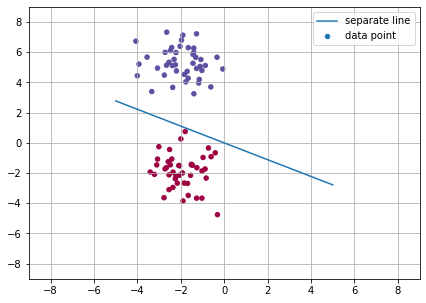

In [146]:
X,y=GenerateData([-2,5],[-2,-2],2,44)
W=logistic(X,y)
live_plot(X,y,W,bias=False,lims=(9,9),scale=5,clear=True,title="")

In [145]:
def cross_entropy_err(X,y,W):
    res=np.dot(X,W)
    # print(res.shape)
    N=X.shape[0]
    part1=sigmoid(-np.multiply(y,res.transpose())).reshape(1,N)
    # print(part1.shape)
    # print(np.dot(y*np.eye(N),X))
    part2=-np.dot(y*np.eye(N),X)
    # print(part2.shape)
    # print(np.dot(part1,part2).shape)
    return np.dot(part1,part2).transpose()

y1=np.array([1,-1])
y1*np.eye(2)
print(y1.reshape(1,2))
print(y1.reshape([1,2]))
x=np.matrix([[3,2,5],[2,3,4]])
print(np.dot(y1*np.eye(2),x))
# y1.reshape(2).shape

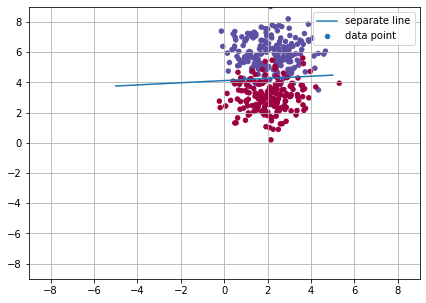

In [165]:
X,y=GenerateData([2,6],[2,3],2,200)
Xb=addBias(X)
W=logistic(Xb,y,epoch=200,learning_rate=0.01)
live_plot(X,y,W,bias=True,lims=(9,9),scale=5,clear=True,title="")

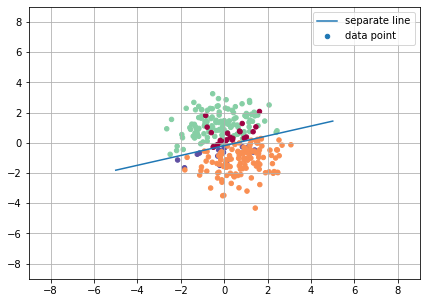

In [190]:
X,y=GenerateData([-0.2,1],[0.7,-1],2,144)
Xb=addBias(X)
W=logistic(Xb,y)
labelY,label=labelError(W,Xb,y)
live_plot(X,labelY,W,bias=True,lims=(9,9),scale=5,clear=True,title="")